# 11. Adding Basemaps with Contextily

If you work with geospatial data in Python, you most likely are familiar with the fantastic [GeoPandas](https://geopandas.org/) library.  GeoPandas leverages the power of [Matplotlib](https://matplotlib.org/) to enable users to make maps of their data.  However, until recently, it has not been easy to add basemaps to these maps. Basemaps are the contextual map data, like Google Maps, on top of which geospatial data are often displayed.


The new Python library [contextily](https://github.com/geopandas/contextily), which stands for *context map tiles*, now makes it possible and relatively straight forward to add basemaps to Geopandas maps. Below we walk through a few common workflows for doing this.

First, let's load are libraries. This assumes you have the following Python libraries installed in your environment:

- pandas
- matplotlib
- geopandas (and all dependancies)
- contextily
- descartes

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

## Read data into a Geopandas GeoDataFrame

Fetch the census places data to map. Census places includes cities and other populated places. Here we fetch the 2019 cartographic boundary (`cb_`) file of California (`06`) places.

In [24]:
ca_places = "https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_06_place_500k.zip"
places = gpd.read_file(ca_places)

Use the geodatarame `plot` method to make a quick map.

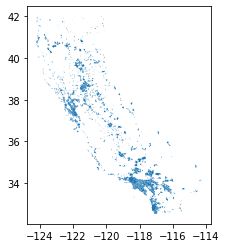

In [28]:
places.plot();

Now that we can see those cities, let's take a look at the data in the geodataframe.

In [29]:
places.head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,36490,02410102,1600000US0636490,0636490,Industry,25,30529397,723181,"POLYGON ((-118.05750 34.01640, -118.05603 34.0..."
1,06,40130,02411620,1600000US0640130,0640130,Lancaster,25,244187339,681671,"POLYGON ((-118.32517 34.75176, -118.32073 34.7..."
2,06,75000,02411987,1600000US0675000,0675000,Stockton,25,161025631,7985703,"POLYGON ((-121.41881 38.04418, -121.41801 38.0..."
3,06,43000,02410866,1600000US0643000,0643000,Long Beach,25,131302222,75937543,"MULTIPOLYGON (((-118.12890 33.75801, -118.1273..."
4,06,78106,02412042,1600000US0678106,0678106,Tehama,25,2057210,0,"POLYGON ((-122.13364 40.02417, -122.13295 40.0..."


We can subset the data by selecting a row or rows by place name. Let's select the city of Berkeley, CA.

In [30]:
berkeley = places[places['NAME']=='Berkeley']

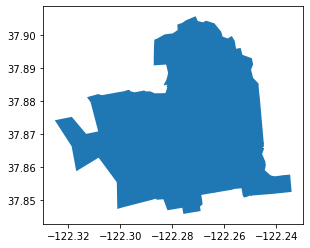

In [32]:
berkeley.plot();

## Use Contextily to add a basemap

Above we can see the map of the boundary of the city of Berkeley, CA.  The axis labels display the longitude and latitude coordinates for the bounding extent of the city.

Let's use `contextily` in it's most simple form to add a basemap to provide the geographic context for Berkeley. 

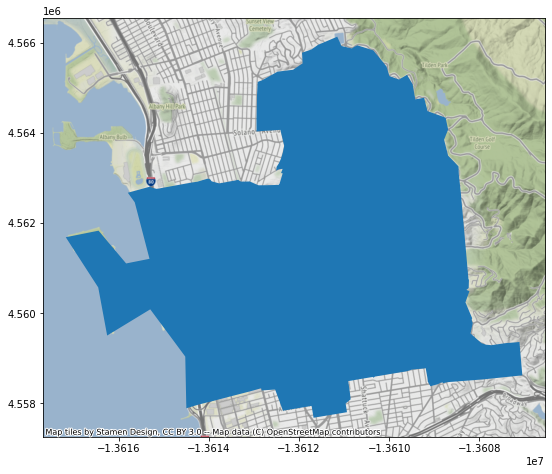

In [33]:
ax = berkeley.to_crs('EPSG:3857').plot(figsize=(9, 9))
cx.add_basemap(ax)

There are a few important things to note about the above code.

- We use `matplotlib` to define the plot canvas as `ax`.
- We then add the contextily basemap to the map with the code `cx.add_basemap(ax)`

Additionally, we **dynamically transform the coordinate reference system**, or CRS, of the Berkeley geodataframe from geographic lat/lon coordinates to `web mercator` using the method **to_crs('EPSG:3857')**. [Web mercator](https://en.wikipedia.org/wiki/Web_Mercator_projection) is the default CRS used by all web map tilesets. It is referenced by a the code `EPSG:3857` where [EPSG](https://en.wikipedia.org/wiki/EPSG_Geodetic_Parameter_Dataset) stands for the the initials of the organization that created these codes  (the European Petroleum Survey Group).

Let's clean up the map by adding some code to change the symbology of the Berkeley city boundary. This will highlight the value of adding a basemap.

First, let's map the boundary with out a fill color.

<AxesSubplot:>

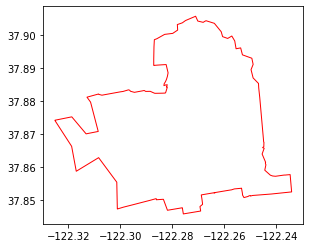

In [37]:
berkeley.plot(edgecolor="red", facecolor="none")

Now, let's build on those symbology options and add the contextily basemap.

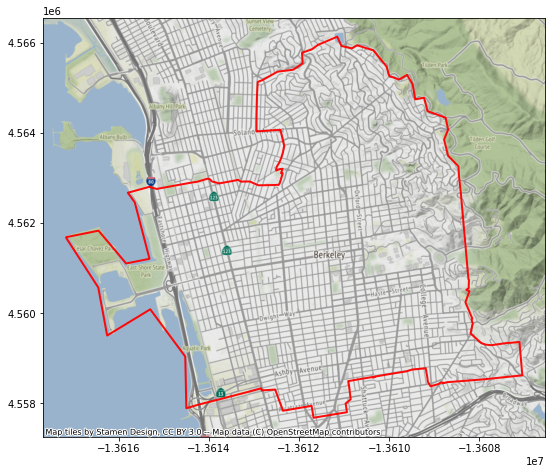

In [39]:
ax = berkeley.to_crs('EPSG:3857').plot(edgecolor="red", 
                                       facecolor="none", # or a color 
                                       alpha=0.95,       # opacity value for colors, 0-1
                                       linewidth=2,      # line, or stroke, thickness
                                       figsize=(9, 9)
                                      )
cx.add_basemap(ax)

## Mapping Point Data

Let's expand on this example by mapping a point dataset of BART station locations.

First we fetch these data from a D-Lab web mapping tutorial.

In [41]:
bart_url = 'https://raw.githubusercontent.com/dlab-berkeley/Geospatial-Fundamentals-in-R-with-sf/master/data/bart.csv'

In [42]:
bart = pd.read_csv(bart_url)

In [43]:
bart.head()

,X,Y,STATION,OPERATOR,DIST,CO
0,-122.283348,37.874061,NORTH BERKELEY,BART,4,ALA
1,-122.268250,37.869689,DOWNTOWN BERKELEY,BART,4,ALA
2,-122.270119,37.853207,ASHBY,BART,4,ALA
3,-122.251777,37.844510,ROCKRIDGE,BART,4,ALA
4,-122.267120,37.828705,MACARTHUR,BART,4,ALA


### Converting Point Data in a dataframe to Geospatial Data in a geodataframe

Because these data are in a CSV file we read them into a Pandas DataFrame.

In order to map these data we need to convert these data to a GeoPandas GeoDataFame. To do this, we need to specify:

- the data, here the geodataframe `bart`
- the coordinate data, here `bart['X']` and `bart['Y']`
- the CRS of the bart coordinate data, here `EPSG:4326`

The CRS code 'EPSG:4326' stands for the World Geodectic System of 1984, or WGS84. This is the most commonly used CRS for geographic (lat/lon) coordinate data.


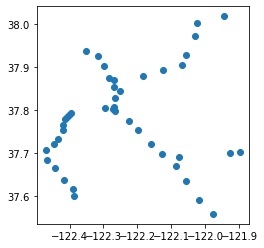

In [45]:
#Convert the DataFrame to a GeoDataFrame. 
bart_gdf = gpd.GeoDataFrame(bart, geometry=gpd.points_from_xy(bart['X'], bart['Y']), crs='EPSG:4326') 

# and take a look
bart_gdf.plot();

Now that we have the BART data in a geodataframe we can use the same commands as we did above to map it with a contextily basemap.

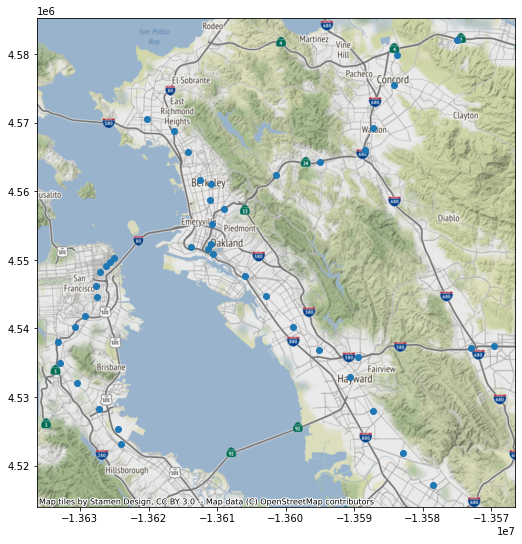

In [47]:
ax = bart_gdf.to_crs('EPSG:3857').plot(figsize=(9, 9))
cx.add_basemap(ax)

We have the full range of `matplotlib` style options to enhance the map, a few of which are shown in the example below.

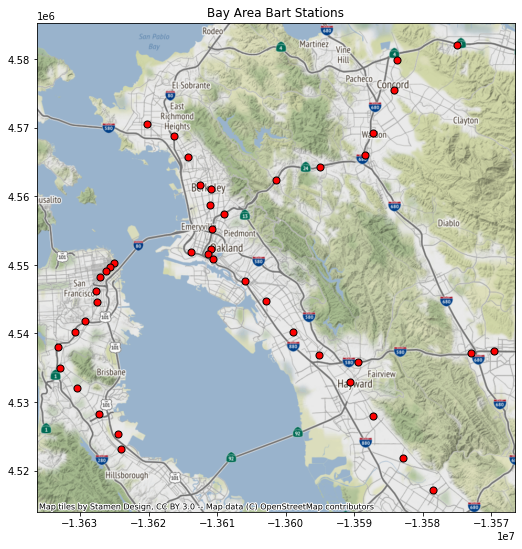

In [49]:
ax = bart_gdf.to_crs('EPSG:3857').plot(
                                    color="red",
                                    edgecolor="black",
                                    markersize=50, 
                                    figsize=(9, 9))

ax.set_title('Bay Area Bart Stations')
cx.add_basemap(ax)

## Changing the Basemap

By default `contextiley` returns maptiles from the OpenStreetmap Mapnik basemap. However, ther are other available tilesets from different providers.  These tilesets are stored in the contextily `cx.providers` dictionary.

That's a large dictionary and you can view it. Alternatively, and more simply, you can access the list of the providers in this dictionary using the command `cs.providers.keys`.

In [53]:
# change basemap - can be one of these
# first see available provider names
cx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])


Once you have the list of providers, you can find the names of their specific tilesets. 

Below, we retrieve the list of the tilesets available from the provider `CartoDB`.

In [55]:
# Then find the names of the tile sets for a specific provider
cx.providers.CartoDB.keys()

dict_keys(['Positron', 'PositronNoLabels', 'PositronOnlyLabels', 'DarkMatter', 'DarkMatterNoLabels', 'DarkMatterOnlyLabels', 'Voyager', 'VoyagerNoLabels', 'VoyagerOnlyLabels', 'VoyagerLabelsUnder'])

Now we can specify a different tileset using the **source** argument to the `add_basemap` method.

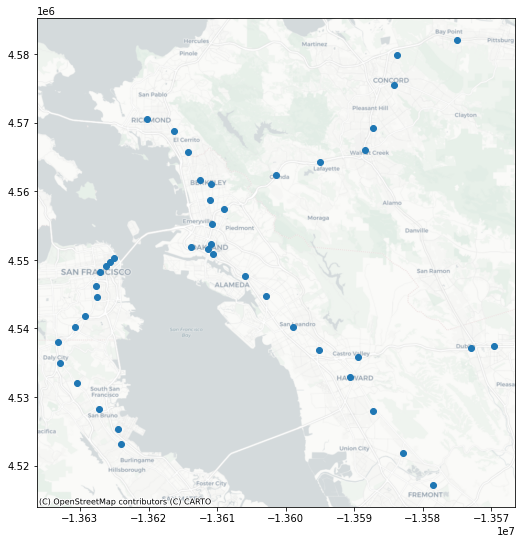

In [57]:
# Change the basemap provider and tileset
ax = bart_gdf.to_crs('EPSG:3857').plot(figsize=(9, 9))
cx.add_basemap(ax,  source=cx.providers.CartoDB.Positron)

# Learning More

Above, we prove a very short introduction to the excellent `contextily` library. You can find more detailed information on the `contextily` homepage, available at: [https://github.com/geopandas/contextily](https://github.com/geopandas/contextily). We especially encourage you to check out the notebook examples provided in that github repo.
